In [1]:
import re
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# sns.set
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
stemmer = nltk.SnowballStemmer('english')
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\saleh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
data = pd.read_csv("Tiktok_reviews.csv")
data=data.dropna()
data

,review,score,liked
0,Perfect,5.0,1.0
1,best,5.0,1.0
2,dog water app,1.0,0.0
3,"Please fix the content preferences, my #fyp ar...",3.0,1.0
4,It's Soo nice app,5.0,1.0
...,...,...,...
4995,Galing,5.0,1.0
4996,Good,3.0,1.0
4997,fun,5.0,1.0
4998,Good,5.0,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   review  5000 non-null   object 
 1   score   5000 non-null   float64
 2   liked   5000 non-null   float64
dtypes: float64(2), object(1)
memory usage: 156.2+ KB


In [4]:
data['liked'].value_counts()

1.0    4079
0.0     921
Name: liked, dtype: int64

<AxesSubplot:xlabel='liked', ylabel='count'>

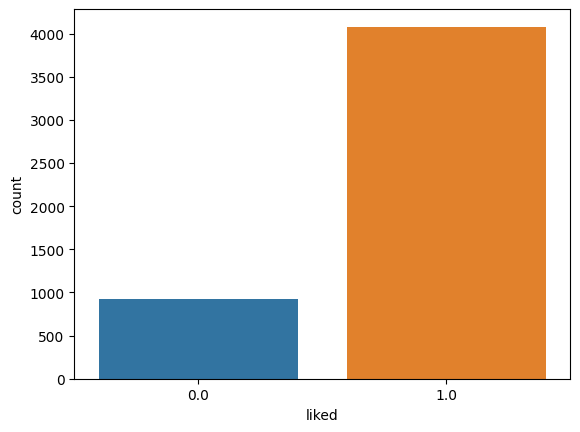

In [5]:
sns.countplot(x=data['liked'])

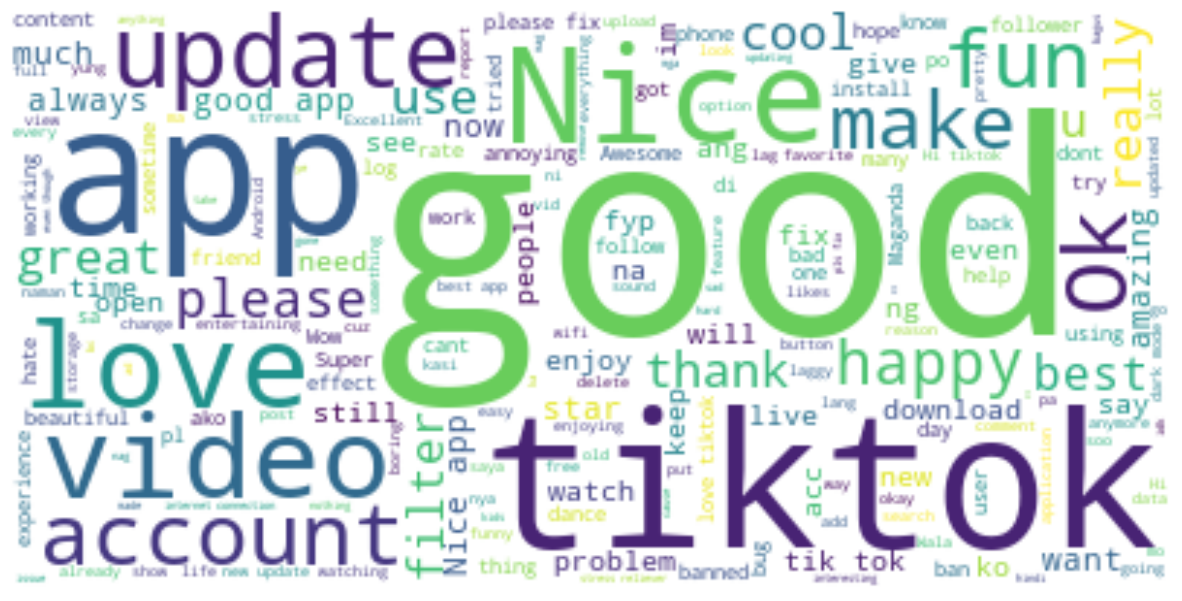

In [6]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(i for i in data.review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
data['review'][3]

'Please fix the content preferences, my #fyp are always full with cringe content from my country'

In [8]:
from nltk.corpus import stopwords

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saleh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data['review']=data['review'].apply(clean)

In [11]:
data=data.dropna()
data

,review,score,liked
0,perfect,5.0,1.0
1,best,5.0,1.0
2,dog water app,1.0,0.0
3,pleas fix content prefer fyp alway full cring ...,3.0,1.0
4,soo nice app,5.0,1.0
...,...,...,...
4995,gale,5.0,1.0
4996,good,3.0,1.0
4997,fun,5.0,1.0
4998,good,5.0,1.0


In [12]:
from nltk.stem import PorterStemmer

In [13]:
ps = PorterStemmer()

In [14]:
s=data['review'][3]
s

'pleas fix content prefer fyp alway full cring content countri'

In [15]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
cv=CountVectorizer()

In [17]:
cv.fit_transform(s.split()).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [18]:
corpus=[]

for i in range(len(data)):
    s=re.sub('[^a-zA-Z]', " ",data['review'][i])
    s=s.lower()
    s=s.split()
    s= [word for word in s if word not in stopwords.words('english')]
    s= ' '.join(s)
    s= ps.stem(s)
    corpus.append(s)
corpus

['perfect',
 'best',
 'dog water app',
 'pleas fix content prefer fyp alway full cring content countri',
 'soo nice app',
 'ttttte',
 'sangat best dan menarik',
 'ilov',
 'good',
 'best video movi funni mo',
 'nice',
 'pleas need account fyp',
 'best',
 'gg',
 'ok',
 'give lik',
 'blah blah',
 'hannahjan',
 '',
 'easi use app',
 'app good cant even deni prais com',
 '',
 'nice app',
 'cool',
 'nice easi use mani friend around globe even make happi band make happi',
 'open tiktok',
 'like use tiktok fun inspir',
 'best applicatian dan surpass fb youtub combin',
 'good watch favorit fan',
 'ang bili kase full storag pangit ng tiktok',
 'good',
 'maganda ako',
 'honest great app problem fyp suck interest button doesnt even work honest annoy bc even dont like content fyp remov content still im tiktok kpop thing stuff fyp full thirst trap anim dont even like comment kind video hope interest button work fyp dont random relat video',
 'filter go pleas bring back filter tiktokkk dont like new 

In [19]:
cv.fit_transform(corpus).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
cv.fit_transform(corpus).toarray().shape

(5000, 3880)

In [21]:
x= cv.fit_transform(corpus).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
y=data['liked']
y

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
4995    1.0
4996    1.0
4997    1.0
4998    1.0
4999    1.0
Name: liked, Length: 5000, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=42)
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
x_train.shape

(4000, 3880)

In [26]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
x_test.shape

(1000, 3880)

In [28]:
from sklearn.naive_bayes import MultinomialNB

In [29]:
clf = MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB()

In [30]:
y_pred = clf.predict(x_test)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 1.

In [31]:
y_test.values

array([1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1.

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [33]:
print(confusion_matrix(y_test, y_pred))

[[ 85 103]
 [ 47 765]]


In [34]:
print(accuracy_score(y_test, y_pred))

0.85


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.45      0.53       188
         1.0       0.88      0.94      0.91       812

    accuracy                           0.85      1000
   macro avg       0.76      0.70      0.72      1000
weighted avg       0.84      0.85      0.84      1000



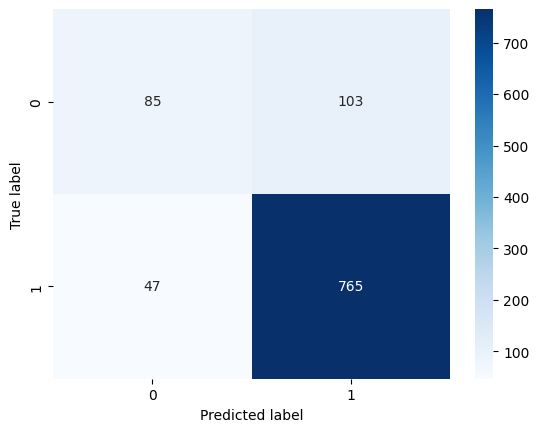

In [36]:
confusion_matrix = np.array([[85, 103], [47, 765]])
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [37]:
# model 
from sklearn.tree import DecisionTreeClassifier


In [38]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [39]:
y_pred = clf.predict(x_test)
y_pred

array([1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1.

In [40]:
y_test.values

array([1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1.

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [42]:
print(confusion_matrix(y_test, y_pred))

[[ 74 114]
 [ 66 746]]


In [43]:
print(accuracy_score(y_test, y_pred))

0.82


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.53      0.39      0.45       188
         1.0       0.87      0.92      0.89       812

    accuracy                           0.82      1000
   macro avg       0.70      0.66      0.67      1000
weighted avg       0.80      0.82      0.81      1000



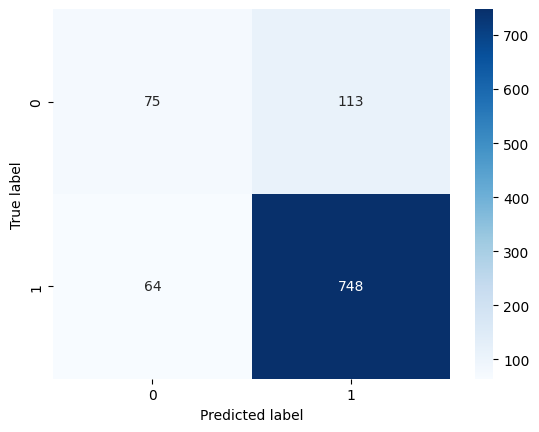

In [45]:
confusion_matrix = np.array([[75, 113], [64, 748]])
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()